# Transformers fine-tune with custom data set

In [249]:
!pip install transformers
!pip install accelerate -U

In [250]:
import torch
#Initially gpu not available
torch.cuda.is_available()

True

In [251]:
torch.cuda.current_device()

0

In [252]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [265]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

import torch

from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split




In [343]:
df = pd.read_csv('IMDB Dataset.csv', nrows=5000)

In [345]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [278]:
#lowercase
df['review'].str.lower()


0       one of the other reviewers has mentioned that ...
1       a wonderful little production. <br /><br />the...
2       i thought this was a wonderful way to spend ti...
3       basically there's a family where a little boy ...
4       petter mattei's "love in the time of money" is...
                              ...                        
4995    an interesting slasher film with multiple susp...
4996    i watched this series when it first came out i...
4997    once again jet li brings his charismatic prese...
4998    i rented this movie, after hearing chris gore ...
4999    this was a big disappointment for me. i think ...
Name: review, Length: 5000, dtype: object

In [279]:
import re
def remove_html_tags(reviews):
    return re.sub(r'<[^<]+?>', '', reviews)

df['review'] = df['review'].apply(remove_html_tags)



In [280]:
df['review'].str.contains('html')

0       False
1       False
2       False
3       False
4       False
        ...  
4995    False
4996    False
4997    False
4998    False
4999    False
Name: review, Length: 5000, dtype: bool

In [281]:
import re

def remove_url(text):
    return re.sub(r'http[s]?://\S+|www\.\S+', '', text)

In [282]:
#import string
#string.punctuation



In [52]:
#exclude  = string.punctuation

In [53]:
#def remove_punctuation(text):
#    for char in exclude:
#        text = text.replace(char, '')
#    return text

In [54]:
#text = "string. with. punctuation?"
#print(remove_punctuation(text))

string with punctuation


In [55]:
# Another method to remove the punctuation from the string

#def remove_punctuation(text):
#    return text.translate(str.maketrans('', '', string.punctuation))

#remove_punctuation("string. with. punctuation?")

'string with punctuation'

In [56]:
#df['review'] = df['review'].apply(remove_punctuation)

In [346]:
df['review'][999]

"This is like a zoology textbook, given that its depiction of animals is so accurate. However, here are a few details that appear to have been slightly modified during the transition to film:<br /><br />- Handgun bullets never hit giant Komodo dragons. It doesn't matter how many times you shoot at the Komodo, bullets just won't go near it.<br /><br />- The best way to avoid being eaten by a giant Cobra, or a giant Komodo dragon, is just to stand there. The exception to this rule is if you've been told to stay very still, in which case you should run off, until the Komodo is right next to you, and then you should stand there, expecting defeat.<br /><br />- Minutes of choppy slow motion footage behind the credits really makes for enjoyable watching.<br /><br />- $5,000 is a memory enhancement tool, and an ample substitute for losing your boating license/getting arrested.<br /><br />- Members of elite army units don't see giant Komodo dragons coming until they are within one metre of the 

In [347]:
df.head(10)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [348]:
df = df[['sentiment','review']]
#df = df_[['airline_sentiment','text']].copy()
#2nd command has same result as 1st command
df.shape

(5000, 2)

In [351]:
#create test set for posit - negat - neutr
#Decrease negative labels by making a random selection from the 9000 negative laels
# substract test set with posit negat and neutr. from total data
# data leftover is training data to split in train and validation


negative_indices = df[df['sentiment'] == 'negative'].sample(n=500, random_state=42).index
positive_indices = df[df['sentiment'] == 'positive'].sample(n=500, random_state=42).index
#neutral_indices = df[df['airline_sentiment'] == 'neutral'].sample(n=500, random_state=42).index

# Create separate DataFrames for positive and selected negative instances
df_positive = df.loc[positive_indices]
df_negative = df.loc[negative_indices]
#df_neutral = df.loc[neutral_indices]

# Concatenate the DataFrames to combine them into a test set
df_TEST_SET = pd.concat([df_positive, df_negative])

#len(df_TEST_SET)
df_TEST_SET.tail(50)

,sentiment,review
85,negative,This was probably the worst movie i have ever ...
1553,negative,French Cinema sucks! Down with all these psych...
1708,negative,The Bloodsucker Leads the Dance - what a laugh...
1705,negative,"Yes, this review may contain spoilers, but you..."
2149,negative,I saw this film without knowing much about it ...
219,negative,Ed Wood rides again. The fact that this movie ...
1313,negative,What are Forest Whitaker and Clifton Collins J...
4654,negative,"(Very light spoilers, maybe.) <br /><br />Norm..."
2410,negative,"Cartoon-like special effects, horrible acting ..."
2209,negative,"This is a good plot concept, so why-o-why is i..."


In [352]:
df_TRAIN_SET = df.drop(df_TEST_SET.index)

print(len(df_TEST_SET), len(df_TRAIN_SET), len(df))

1000 4000 5000


In [353]:
df_TEST_SET.head(5)

,sentiment,review
3416,positive,Incredibly ARTISTIC NOBODY COULD MAKE THEM NOW...
2914,positive,This is a hard show to watch. It's not somethi...
3388,positive,"This delightful, well written film is based on..."
4371,positive,I've loved this movie ever since it first came...
1998,positive,I loved this movie! It was all I could do not ...


In [354]:
#map positive and negative to other 3
target_map = {'positive': 0, 'negative': 1}
target_map
df_TRAIN_SET['target'] = df_TRAIN_SET['sentiment'].map(target_map)
df_TEST_SET['target'] = df_TEST_SET['sentiment'].map(target_map)

In [355]:
df_TRAIN_SET.head(5)

,sentiment,review,target
0,positive,One of the other reviewers has mentioned that ...,0
1,positive,A wonderful little production. <br /><br />The...,0
2,positive,I thought this was a wonderful way to spend ti...,0
3,negative,Basically there's a family where a little boy ...,1
4,positive,"Petter Mattei's ""Love in the Time of Money"" is...",0


In [356]:
df_TEST_SET.iloc[-1]

sentiment                                             negative
review       Connery climbs aboard the Moore buffoon train ...
target                                                       1
Name: 3296, dtype: object

In [357]:
df_TEST = df_TEST_SET[['review','target']]
#df2
df_TEST.columns = ['sentence', 'label']
#df2
df_TEST.to_csv('testdata.csv', index=None)

In [358]:
df_TRAIN = df_TRAIN_SET[['review','target']]
#df2
df_TRAIN.columns = ['sentence', 'label']
#df2
df_TRAIN.to_csv('traindata.csv', index=None)

In [359]:
df_TEST.head(5)
len(df_TEST)

1000

In [360]:
df_TRAIN.head(5)
len(df_TRAIN)

4000

In [361]:
!pip install datasets

In [362]:
!pip install datasets
import datasets
from datasets import load_dataset
raw_dataset = load_dataset('csv', data_files='traindata.csv')

Generating train split: 0 examples [00:00, ? examples/s]

In [363]:
raw_dataset

DatasetDict({
    train: Dataset({
        features: ['sentence', 'label'],
        num_rows: 4000
    })
})

In [364]:
split_sets = raw_dataset['train'].train_test_split(test_size=0.1, seed=42)
split_sets

DatasetDict({
    train: Dataset({
        features: ['sentence', 'label'],
        num_rows: 3600
    })
    test: Dataset({
        features: ['sentence', 'label'],
        num_rows: 400
    })
})

In [302]:
#dir(split_sets['test'])

In [303]:
#data is an attribute so
#split_sets['test'].data
#or
#split_sets['test'].data['label']

In [304]:
#dir(split_sets['test'])
#one of the attributes is feature

In [305]:
#split_sets['test'].features

In [306]:
#for multiple csv files
#load_dataset('csv', data_files=['file1.csv','file2.csv'])

In [307]:
#if u already have a train-test split:
#load_dataset(
  #'csv',
  #data_files={'train': ['train1.csv','train2.csv'],
            #'test': 'test.csv'


    #}

#)

In [365]:
checkpoint = 'distilbert-base-cased'

In [366]:
from transformers import AutoTokenizer

In [367]:
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

In [368]:
#padding will be handled automatically by the trainer, so not done here
def tokenize_fn(batch):
    return tokenizer(batch['sentence'], truncation=True)

In [369]:
tokenized_datasets = split_sets.map(tokenize_fn, batched=True)

Map:   0%|          | 0/3600 [00:00<?, ? examples/s]

Map:   0%|          | 0/400 [00:00<?, ? examples/s]

In [313]:
#def tokenize_fn(batch):
#    return tokenizer(batch, truncation=True, return_tensors='pt')



In [314]:
#tokenized_datasets = split_sets.map(tokenize_fn, batched=True)

In [315]:
#tokenized_datasetsi = tokenize_fn('hello who\'s there guy')

#tokenized_datasetsi

# The tokens can be retrieved by decoding the input IDs
#tokens = tokenizer.convert_ids_to_tokens(tokenized_datasetsi['input_ids'][0])

# Print the tokens
#print(tokens)

In [316]:
# Encode the text
#encoded_input = tokenizer(text, return_tensors='pt')

# The tokens can be retrieved by decoding the input IDs
#tokens = tokenizer.convert_ids_to_tokens(encoded_input['input_ids'][0])

# Print the tokens
#print(tokens)

In [370]:
#check if tokenized: reasoning : input_ids should be more than split words
tokenized_datasets['train']['sentence'][10]
#listi=tokenized_datasets['train']['sentence'][10].split()
#listi
#len(listi)
#len list = 166 = split words
#tokenized_datasets['train']['input_ids'][1]
#len(tokenized_datasets['train']['input_ids'][10])
#len tokenized datasets input ids = 191
#tokenized_datasets['train']['attention_mask'][1]
#len(tokenized_datasets['train']['attention_mask'][10])
#len tokenized datasets attention_mask = 191

"In his first go as a Hollywood director, Henry Brommell whips an enthralling yarn that is all of penetrating relatable marital issues with melancholic authenticity, and lacing such with an equally absorbing subplot of a father-son hit-man business. The film is directed astutely and consists of a wonderfully put together cast as well as a swift, family-conscious screenplay (also by Brommell) that brings life to an otherwise fatigued genre. As a bonus, 'Panic' delivers subtle, acerbic humor\x97an unexpected, undeniably charming, and very welcome surprise\x97through its bumbling, unsure-of-himself, low-key star, whose ever-cool state is enticing, especially given his line of work.<br /><br />The forever-great William H. Macy again captures our hearts as Alex, a unhappy, torn, middle-aged husband and father who finds solace in the most dubious of persons: a young, attractive, equally-messed-up 23-year-old named Sarah (Neve Campbell), whom he meets in the waiting-room at a psychologist's o

In [371]:
#tokenized_datasets = split_sets.map(tokenize_fn, batched=True)
#tokenized_datasets['train']['sentence'][0]

tokenized_datasets['test']['sentence'][1]

'I have done a lot of international travel, both on business and as a tourist. For both types I assure you the best advice is also the oldest: Always drink the wine of the country. In this movie the archangel Michael comes to Earth on business, wraps it up quickly and decides to hang around for a little touring. Boy! Does he "drink the wine of the country."<br /><br />Could man be drunk forever with liquor, love and fights <br /><br />He\'d lief rise up of mornings and lief lie down of nights.<br /><br />These are things you can\'t do in Heaven so he enjoys them while he\'s here! Of course it turns out he had a couple of other jobs to tackle and, if he is less direct about them than he was about the first one, he is just as successful. The final scene is a little schmaltzy but it is also wonderful. Jean Stapleton gets to dance with John Travolta.'

In [372]:
from transformers import AutoModelForSequenceClassification, \
Trainer, TrainingArguments

In [373]:
model = AutoModelForSequenceClassification.from_pretrained(checkpoint, num_labels=2)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-cased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [374]:
model.to(device)


DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(28996, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): MultiHeadSelfAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)
 

In [375]:
!pip install torchinfo

In [376]:
from torchinfo import summary

In [377]:
summary(model)

Layer (type:depth-idx)                                  Param #
DistilBertForSequenceClassification                     --
├─DistilBertModel: 1-1                                  --
│    └─Embeddings: 2-1                                  --
│    │    └─Embedding: 3-1                              22,268,928
│    │    └─Embedding: 3-2                              393,216
│    │    └─LayerNorm: 3-3                              1,536
│    │    └─Dropout: 3-4                                --
│    └─Transformer: 2-2                                 --
│    │    └─ModuleList: 3-5                             42,527,232
├─Linear: 1-2                                           590,592
├─Linear: 1-3                                           1,538
├─Dropout: 1-4                                          --
Total params: 65,783,042
Trainable params: 65,783,042
Non-trainable params: 0

model

In [378]:
model

DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(28996, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): MultiHeadSelfAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)
 

In [379]:
training_args = TrainingArguments(output_dir='training_dir',
                                  evaluation_strategy='epoch',
                                  save_strategy='epoch',
                                  num_train_epochs=1,
                                  per_device_train_batch_size=5,
                                  per_device_eval_batch_size=5,
                                 )






In [380]:
TrainingArguments

transformers.training_args.TrainingArguments

In [381]:
def compute_metrics(logits_and_labels):
    logits, labels = logits_and_labels
    predictions = np.argmax(logits, axis=-1)
    acc = np.mean(predictions == labels)
    f1 = f1_score(labels, predictions, average='macro')
    return {'accuracy': acc, 'f1' : f1}

In [382]:
trainer = Trainer(
    model,
    training_args,
    train_dataset = tokenized_datasets["train"],
    eval_dataset = tokenized_datasets["test"],
    tokenizer = tokenizer,
    compute_metrics = compute_metrics,
)

/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:436: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False, even_batches=True, use_seedable_sampler=True)
  warnings.warn(


In [330]:
#import torch
#from transformers import AutoTokenizer, AutoModel

# You don't necessarily need the model if you just want to see the tokenization.
#tokenizer = AutoTokenizer.from_pretrained('distilbert-base-uncased')

#text = "Replace me by any text you'd like."

# Encode the text
#encoded_input = tokenizer(text, return_tensors='pt')

# The tokens can be retrieved by decoding the input IDs
#tokens = tokenizer.convert_ids_to_tokens(encoded_input['input_ids'][0])

# Print the tokens
#print(tokens)

# If you want to see the IDs of the tokens:
#print(encoded_input['input_ids'])


In [383]:
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.373500,nan,0.480000,0.324324


Checkpoint destination directory training_dir/checkpoint-720 already exists and is non-empty. Saving will proceed but saved results may be invalid.


TrainOutput(global_step=720, training_loss=0.259375, metrics={'train_runtime': 51.5393, 'train_samples_per_second': 69.85, 'train_steps_per_second': 13.97, 'total_flos': 419358926020620.0, 'train_loss': 0.259375, 'epoch': 1.0})

In [387]:
!ls training_dir

checkpoint-720	checkpoint-8820  runs


In [388]:
from transformers import pipeline

In [390]:
savedmodel = pipeline('text-classification', model = 'training_dir/checkpoint-720', device=0)

In [391]:
test_pred = savedmodel("The weather is so good today")
test_pred

[{'label': 'LABEL_0', 'score': nan}]

In [392]:
test_pred = savedmodel("I feel awful today")
test_pred

[{'label': 'LABEL_0', 'score': nan}]

In [393]:
test_pred = savedmodel("I drink coffee")
test_pred

[{'label': 'LABEL_0', 'score': nan}]

In [394]:
test_pred = savedmodel(split_sets['test']['sentence'])

Token indices sequence length is longer than the specified maximum sequence length for this model (1032 > 512). Running this sequence through the model will result in indexing errors


RuntimeError: The size of tensor a (1032) must match the size of tensor b (512) at non-singleton dimension 1

In [395]:
test_pred

[{'label': 'LABEL_0', 'score': nan}]

In [396]:
test_pred2=[]
for item in test_pred:
    test_pred2.append(item)

In [ ]:


test_pred2

[]

In [ ]:
def get_label(d):
    return int(d['label'].split('_')[1])
test_pred = [get_label(d) for d in test_pred]
test_pred

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,


In [ ]:

#get conf meas
def get_conf_meas(d):
    return d['score']
test_pred_confmeas = [get_conf_meas(d) for d in test_pred2]
test_pred_confmeas


[0.9893078207969666,
 0.9949111342430115,
 0.9974259734153748,
 0.6930809020996094,
 0.9506092667579651,
 0.9736645817756653,
 0.9975343942642212,
 0.9953228831291199,
 0.9638331532478333,
 0.9481191039085388,
 0.9963235855102539,
 0.9974703788757324,
 0.5431450009346008,
 0.9972236156463623,
 0.9845521450042725,
 0.9543877243995667,
 0.9763373136520386,
 0.8635152578353882,
 0.9882897138595581,
 0.9940485954284668,
 0.9763973951339722,
 0.6265029907226562,
 0.997337281703949,
 0.9682638645172119,
 0.993905246257782,
 0.7779857516288757,
 0.9941734671592712,
 0.997093915939331,
 0.9968660473823547,
 0.6764406561851501,
 0.9913502931594849,
 0.897299587726593,
 0.9950730204582214,
 0.9835399389266968,
 0.9291086792945862,
 0.9916108250617981,
 0.9961718916893005,
 0.9959396123886108,
 0.8959037065505981,
 0.9696687459945679,
 0.7871333360671997,
 0.6683904528617859,
 0.9961532950401306,
 0.930134117603302,
 0.9485098719596863,
 0.9849604964256287,
 0.9803918600082397,
 0.966509878635406

In [ ]:
print("acc:", accuracy_score(split_sets['test']['label'], test_pred))
reference = split_sets['test']['label']
#type(test_pred)
reference

acc: 0.8767123287671232


[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,


In [ ]:
print("f1:", f1_score(reference, test_pred, average='macro'))



f1: 0.7872792027916682


In [ ]:
import seaborn as sn
import matplotlib.pyplot as plt

In [ ]:
def plot_cm(cm):
    #label_0 = negative, label_1 = positive, label_2 = neutral
    classes = ['other','neutral']
    df_cm = pd.DataFrame(cm, index=classes, columns=classes)
    ax = sn.heatmap(df_cm, annot=True, fmt='g')
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Target")

In [ ]:
cm = confusion_matrix(split_sets['test']['label'], test_pred, normalize='true')
cm


array([[0.94976303, 0.05023697],
       [0.42084942, 0.57915058]])

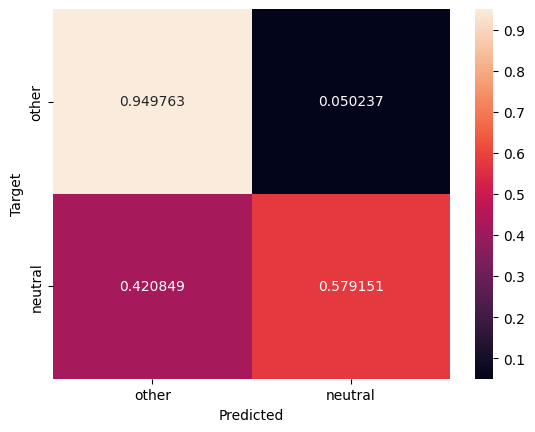

In [ ]:
plot_cm(cm)
